<a href="https://colab.research.google.com/github/MoonShineToSpace/Colab/blob/main/IMDB_Keras_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
type(train_data)

numpy.ndarray

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict( [(value,key) for (key,value) in word_index.items()])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review=' '.join([reverse_word_index.get(i-3,"?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
from numpy.core.fromnumeric import var
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i ,sequence in enumerate(sequences):
    for j in sequence:
      results[i,j]=1.

  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)




In [ ]:
x_train.shape
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([layers.Dense(16,activation='relu'),layers.Dense(16,activation='relu'),layers.Dense(1,activation='sigmoid')])


In [ ]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
x_val=x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))



Epoch 1/20
30/30 [==============================] - 7s 57ms/step - loss: 0.5342 - accuracy: 0.7710 - val_loss: 0.3972 - val_accuracy: 0.8659
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3245 - accuracy: 0.8944 - val_loss: 0.3423 - val_accuracy: 0.8672
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2429 - accuracy: 0.9197 - val_loss: 0.2831 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1968 - accuracy: 0.9336 - val_loss: 0.2747 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1622 - accuracy: 0.9481 - val_loss: 0.3023 - val_accuracy: 0.8789
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1347 - accuracy: 0.9583 - val_loss: 0.2832 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1167 - accuracy: 0.9635 - val_loss: 0.2939 - val_accuracy: 0.8848
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

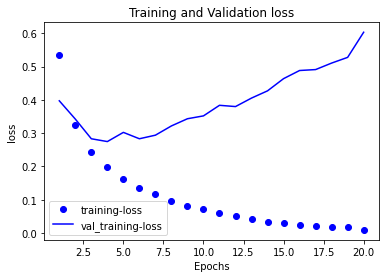

In [ ]:
import matplotlib.pyplot as plt
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, "bo",label="training-loss")
plt.plot(epochs, val_loss_values,"b",label="val_training-loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()



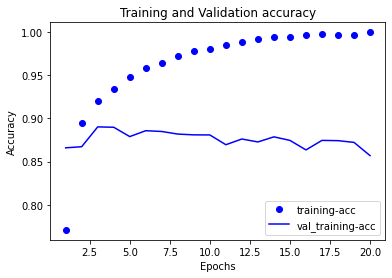

In [ ]:
import matplotlib.pyplot as plt
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, "bo",label="training-acc")
plt.plot(epochs, val_loss_values,"b",label="val_training-acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()